In [1]:
# IMport Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv

import os,glob


import PIL
import tensorflow as tf
import matplotlib.image as image
import seaborn as sns
from PIL import Image

from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras.utils import load_img
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dropout, Dense, BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
import random
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from keras.utils.np_utils import to_categorical

import warnings
warnings.filterwarnings('ignore')


In [2]:
from numpy.random import seed
seed(1)

import tensorflow
tensorflow.random.set_seed(2)

In [3]:
dir_path = 'C:\\Users\\aakas\\Documents\\Data Mining G#\\ai project\\BirdVsDrone'
digits = sorted(os.listdir(dir_path))
NUM_CLASSES = len(digits)
print(digits)
print('Number of classes : ', NUM_CLASSES)

['.ipynb_checkpoints', 'Birds', 'Drones', 'app.py', 'bird-vs-drone-1.ipynb', 'model.pkl', 'modelf.pkl', 'static', 'static.zip', 'templates']
Number of classes :  10


In [4]:
bird_path='C:\\Users\\aakas\\Documents\\Data Mining G#\\ai project\\BirdVsDrone\\Birds'
drone_path='C:\\Users\\aakas\\Documents\\Data Mining G#\\ai project\\BirdVsDrone\\Drones'

In [5]:
bird_path_grey='C:\\Users\\aakas\\Documents\\Data Mining G#\\ai project\\BirdsGray'
drone_path_grey='C:\\Users\\aakas\\Documents\\Data Mining G#\\ai project\\DronesGray'

In [6]:
#create an empty DataFrame for RGB images
df = pd.DataFrame(columns=['path','label'])

#loop over bird images and label them 0
for dirname, _, filenames in os.walk(bird_path):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'bird']],columns=['path','label']))

#loop over Drone images and label them 1
for dirname, _, filenames in os.walk(drone_path):
    for filename in filenames:
        df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'drone']],columns=['path','label']))
        #print(os.path.join(dirname, filename))

#shuffle the dataset for redistribute the labels
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

path  label
0  C:\Users\aakas\Documents\Data Mining G#\ai pro...   bird
1  C:\Users\aakas\Documents\Data Mining G#\ai pro...  drone
2  C:\Users\aakas\Documents\Data Mining G#\ai pro...  drone
3  C:\Users\aakas\Documents\Data Mining G#\ai pro...  drone
4  C:\Users\aakas\Documents\Data Mining G#\ai pro...  drone
5  C:\Users\aakas\Documents\Data Mining G#\ai pro...   bird
6  C:\Users\aakas\Documents\Data Mining G#\ai pro...  drone
7  C:\Users\aakas\Documents\Data Mining G#\ai pro...  drone
8  C:\Users\aakas\Documents\Data Mining G#\ai pro...  drone
9  C:\Users\aakas\Documents\Data Mining G#\ai pro...  drone

In [40]:
df.path[0]

'C:\\Users\\aakas\\Documents\\Data Mining G#\\ai project\\BirdVsDrone\\Birds\\singleBirdinsky71.jpeg'

In [8]:
df.shape

(828, 2)

<AxesSubplot:>

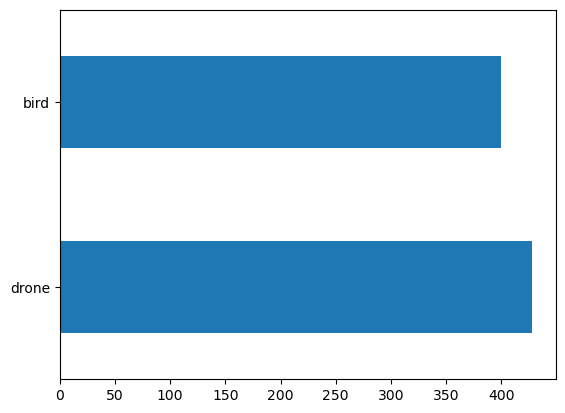

In [9]:
df['label'].value_counts().plot.barh()

### Grey scale images

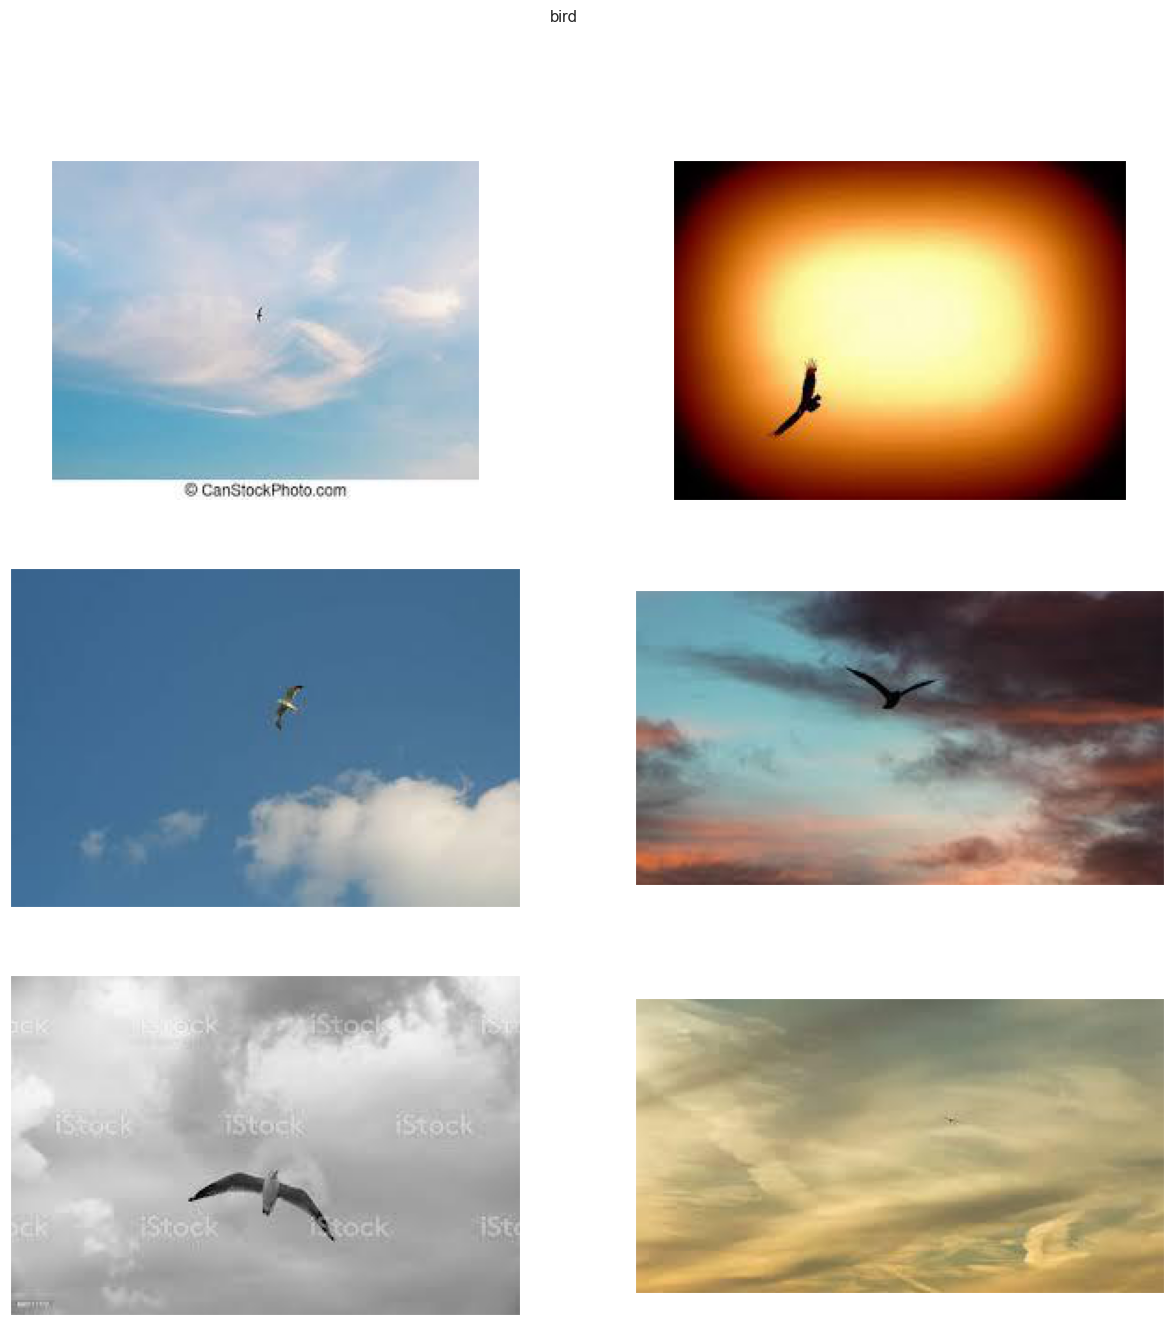

In [10]:
from keras.preprocessing import image

label = 'bird' 
data = df[df['label'] == label]
sns.set_style('dark')


pics = 6 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('bird')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = tf.keras.utils.load_img(path)
    img = tf.keras.utils.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

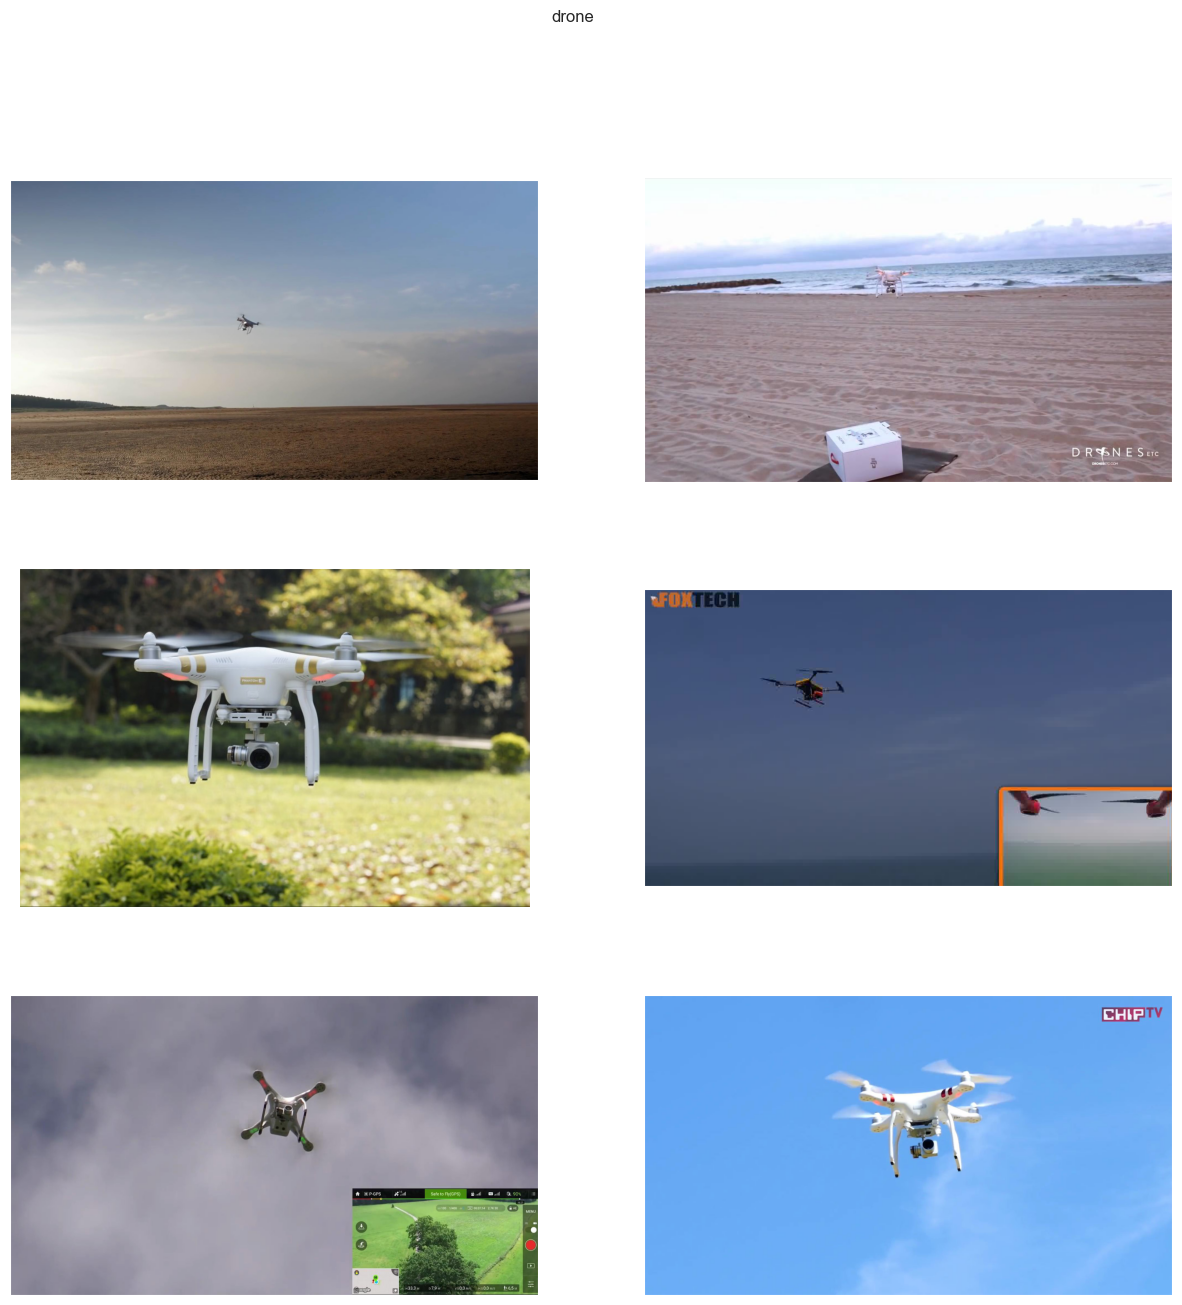

In [11]:
label = 'drone' 
data = df[df['label'] == label]
sns.set_style('dark')


pics = 6 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('drone')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = tf.keras.utils.load_img(path)
    img = tf.keras.utils.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

### RGB generator

In [12]:
generator = ImageDataGenerator(
        rescale = 1/255,
        validation_split=0.2,
        rotation_range=8, # rotation
        width_shift_range=0.1, # horizontal shift
        height_shift_range=0.1, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.8,1.3] # brightness
)

In [13]:
train_gen = generator.flow_from_dataframe(df,x_col='path',y_col='label',target_size=(256,256),
                                          batch_size=32,
                                          class_mode='categorical',subset='training',seed=42)
val_gen = generator.flow_from_dataframe(df,x_col='path',y_col='label',target_size=(256,256),
                                        batch_size=32,
                                        class_mode='categorical',subset='validation',seed=42)

Found 661 validated image filenames belonging to 2 classes.
Found 165 validated image filenames belonging to 2 classes.


In [14]:
train_gen.image_shape

(256, 256, 3)

# Image Visulization


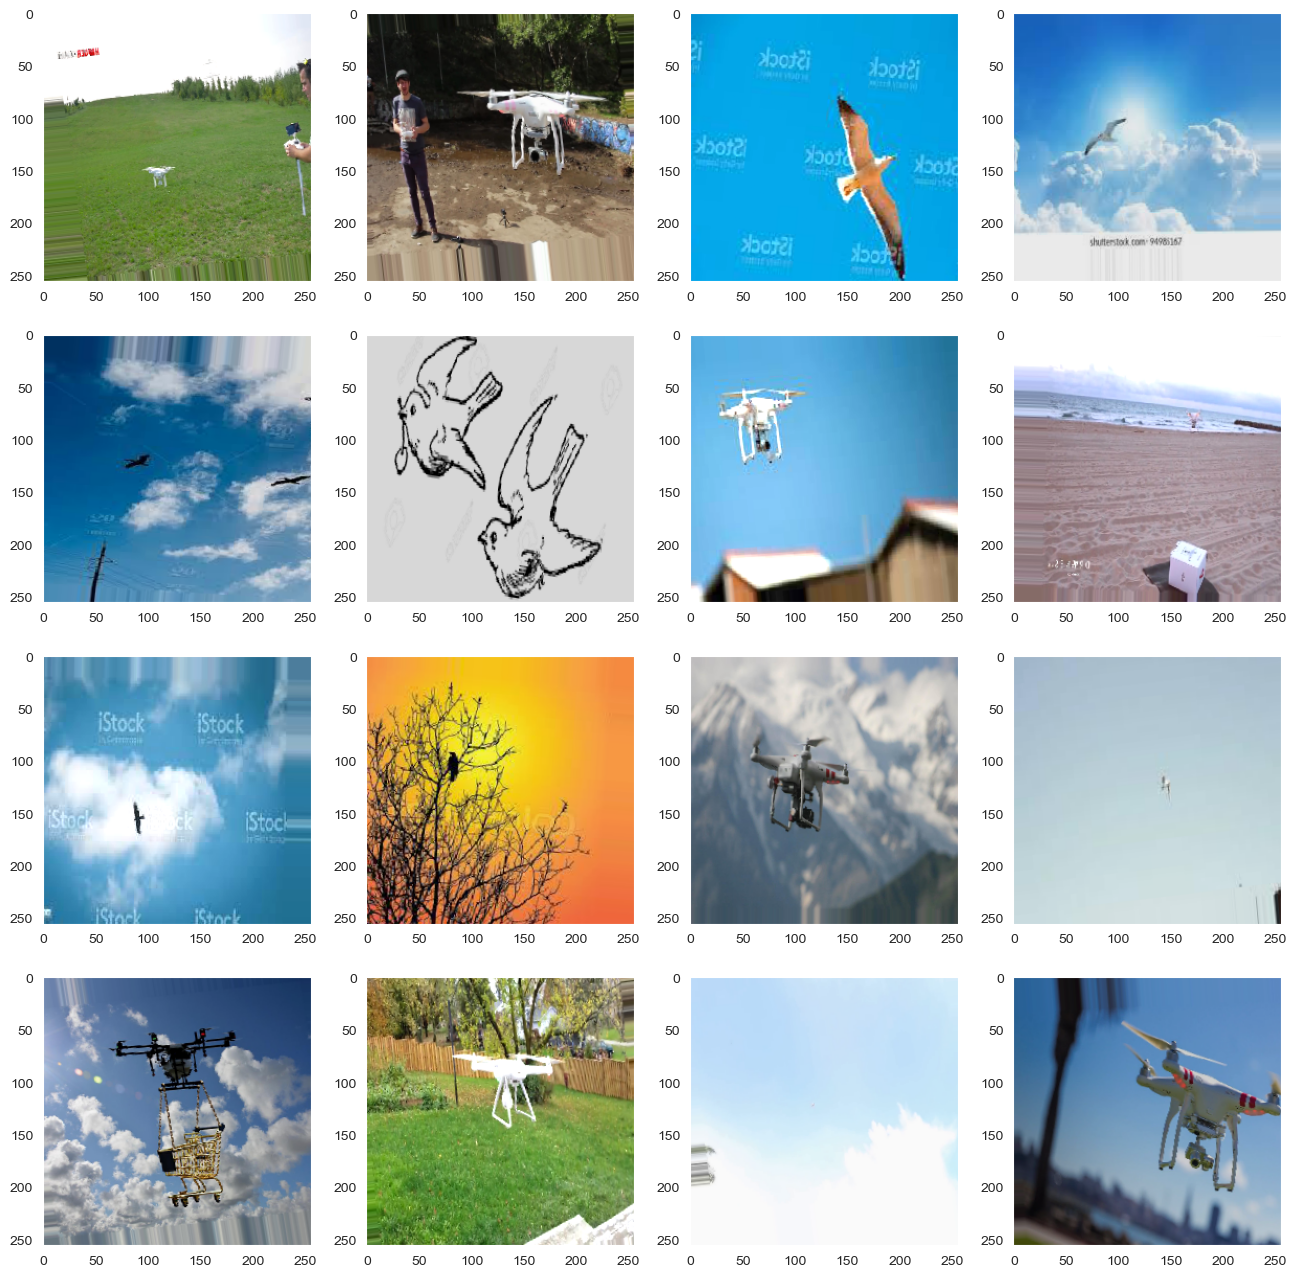

In [15]:
w = 10
h = 10

x= train_gen.next()
image = x[0]
fig = plt.figure(figsize=(16, 16))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    img = image[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

### grey scale image generator

In [16]:
def to_grayscale_then_rgb(image):
    image = tf.image.rgb_to_grayscale(image)
#     print(image.shape)
    return image



In [17]:
image = cv.imread("C:\\Users\\aakas\\Documents\\Data Mining G#\\ai project\\BirdVsDrone\\Birds\\singleBirdinsky71.jpeg")
# 
img=to_grayscale_then_rgb(image)
print(img.shape)

(194, 259, 1)


In [18]:
generator_grey = ImageDataGenerator(
        rescale = 1/255,
        validation_split=0.2,
        rotation_range=8, # rotation
        width_shift_range=0.1, # horizontal shift
        height_shift_range=0.1, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.8,1.3] # brightness
    
)

In [19]:
train_gen_grey = generator_grey.flow_from_dataframe(df,x_col='path',y_col='label',target_size=(256,256),
                                          batch_size=32,
                                        color_mode='grayscale',
                                          class_mode='categorical',subset='training',seed=42)
val_gen_grey = generator_grey.flow_from_dataframe(df,x_col='path',y_col='label',target_size=(256,256),
                                        batch_size=32,
                                      color_mode='grayscale',
                                        class_mode='categorical',subset='validation',seed=42)

Found 661 validated image filenames belonging to 2 classes.
Found 165 validated image filenames belonging to 2 classes.


In [20]:
train_gen_grey.image_shape

(256, 256, 1)

In [21]:
val_gen_grey.image_shape

(256, 256, 1)

# Convolution Neural Nets

In [22]:
input_layer=Input(shape=(256,256,3))
layer=Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding="same")(input_layer)
layer=MaxPool2D(pool_size=(2,2),strides=(1,1))(layer)
layer=BatchNormalization()(layer)
layer=Dropout(0.5)(layer)

layer=Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding="same")(input_layer)
layer=MaxPool2D(pool_size=(2,2),strides=(1,1))(layer)
layer=BatchNormalization()(layer)
layer=Dropout(0.5)(layer)

layer=Conv2D(filters=16,kernel_size=(3,3),activation="relu",padding="same")(input_layer)
layer=MaxPool2D(pool_size=(2,2),strides=(1,1))(layer)
layer=BatchNormalization()(layer)
layer=Dropout(0.5)(layer)

layer=Flatten()(layer)

layer=Dense(64,activation="relu")(layer)
layer=BatchNormalization()(layer)
layer=Dropout(0.5)(layer)

layer=Dense(32,activation="relu")(layer)
output_layer=Dense(2,activation="softmax")(layer)
model2=Model(inputs=input_layer,outputs=output_layer)
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 255, 255, 16)     0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 255, 255, 16)     64        
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 255, 255, 16)      0         
                                                                 
 flatten (Flatten)           (None, 1040400)           0     

In [23]:
model2.compile(loss='categorical_crossentropy',
       optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
       metrics=['accuracy'])

In [25]:
history2 = model2.fit(
    train_gen,
    epochs=15,
    validation_data=val_gen,
)

Epoch 1/15
21/21 [==============================] - 49s 2s/step - loss: 0.8425 - accuracy: 0.6127 - val_loss: 0.9289 - val_accuracy: 0.5152
Epoch 2/15
21/21 [==============================] - 48s 2s/step - loss: 0.7211 - accuracy: 0.6566 - val_loss: 0.7179 - val_accuracy: 0.5576
Epoch 3/15
21/21 [==============================] - 48s 2s/step - loss: 0.7461 - accuracy: 0.6505 - val_loss: 0.6357 - val_accuracy: 0.6121
Epoch 4/15
21/21 [==============================] - 47s 2s/step - loss: 0.7129 - accuracy: 0.6596 - val_loss: 0.6252 - val_accuracy: 0.6303
Epoch 5/15
21/21 [==============================] - 50s 2s/step - loss: 0.6937 - accuracy: 0.6581 - val_loss: 0.6038 - val_accuracy: 0.6848
Epoch 6/15
21/21 [==============================] - 54s 3s/step - loss: 0.6820 - accuracy: 0.6702 - val_loss: 0.6271 - val_accuracy: 0.6182
Epoch 7/15
21/21 [==============================] - 51s 2s/step - loss: 0.6376 - accuracy: 0.6823 - val_loss: 0.5918 - val_accuracy: 0.6667
Epoch 8/15
21/21 [==

# Training curve for CNN

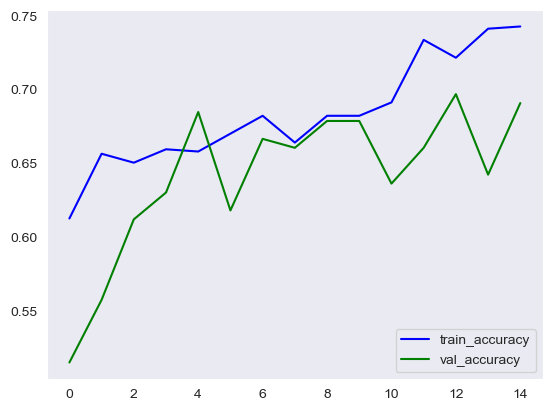

In [26]:
hist=history2.history
plt.plot(hist["accuracy"],color="b",label="train_accuracy")
plt.plot(hist["val_accuracy"],color="g",label="val_accuracy")
plt.legend(loc="lower right")
plt.show()

In [27]:
model2.evaluate(train_gen)

21/21 [==============================] - 17s 828ms/step - loss: 0.5094 - accuracy: 0.7337


[0.5094350576400757, 0.7337367534637451]

In [28]:
model2.evaluate(val_gen)

6/6 [==============================] - 5s 745ms/step - loss: 0.5581 - accuracy: 0.7030


[0.5580887198448181, 0.7030302882194519]

In [31]:

img = Image.open('C:\\Users\\aakas\\Documents\\Data Mining G#\\ai project\\BirdVsDrone\\Drones\\video17_728.JPEG')
img = img.resize((256, 256))

img_array = np.array(img)
img_array = np.reshape(img_array, (1, 256, 256, 3))
probs = model2.predict(img_array)

predicted_class = np.argmax(probs)
print("Predicted class:", predicted_class)
# class=0 bird,class=1 drone





1/1 [==============================] - 4s 4s/step
Predicted class: 0


In [32]:
files=val_gen.filenames
class_dict=val_gen.class_indices # a dictionary of the form class name: class index
rev_dict={}
for key, value in class_dict.items():
    rev_dict[value]=key   # dictionary of the form class index: class name

In [33]:
predictions = model2.predict(val_gen)

6/6 [==============================] - 5s 794ms/step


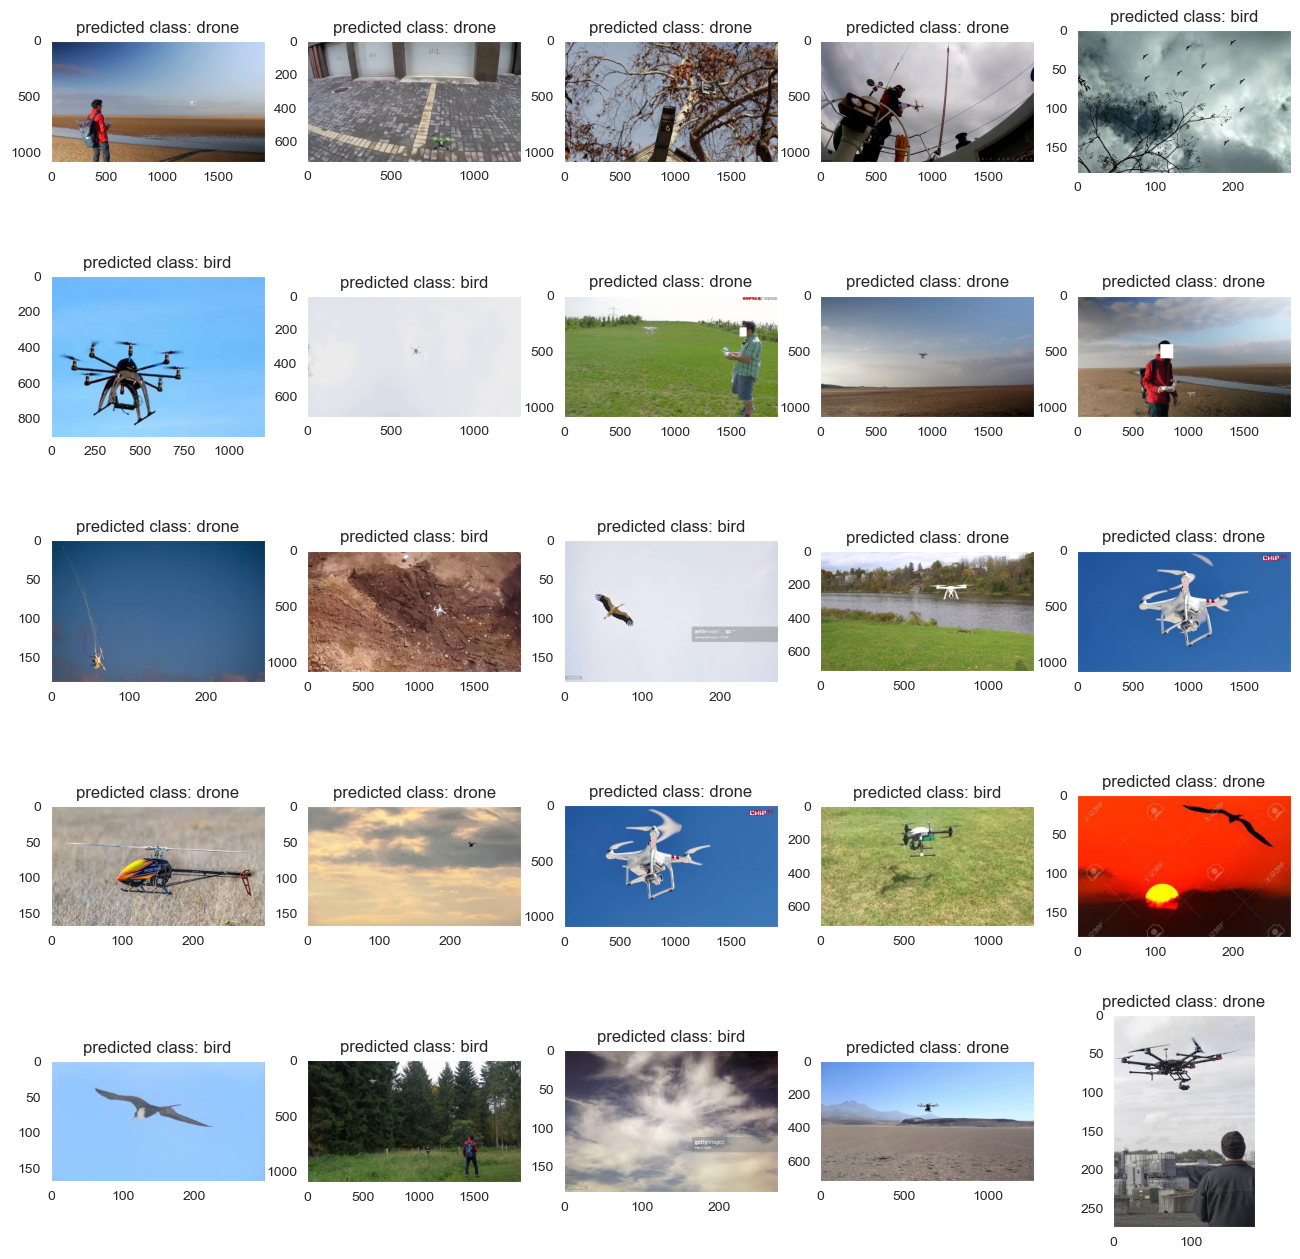

In [34]:
fig = plt.figure(figsize=(16, 16))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    index=np.argmax(predictions[i])
    klass=rev_dict[index] 
    im = Image.open(files[i])
    img=np.array(im)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.title(f'predicted class: { klass}')
plt.show()

In [29]:
import pickle
pickle.dump(model2,open('modelf.pkl','wb'))